In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
data = pd.read_csv('data_steam.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23240 entries, 0 to 23239
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  23240 non-null  object 
 1   user_id             23240 non-null  object 
 2   item_id             23240 non-null  int64  
 3   title               23240 non-null  object 
 4   genre               23240 non-null  object 
 5   developer           23240 non-null  object 
 6   release_date        23240 non-null  int64  
 7   price               23240 non-null  float64
 8   recommend           23240 non-null  int64  
 9   year_posted         23240 non-null  int64  
 10  sentiment_analysis  23240 non-null  int64  
 11  playtime_forever    23240 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


In [8]:
data

,id,user_id,item_id,title,genre,developer,release_date,price,recommend,year_posted,sentiment_analysis,playtime_forever
0,7656119797098247922200,76561197970982479,22200,Zeno Clash,Action,ACE Team,2009,9.99,1,2011,2,271
1,765611979709824791250,76561197970982479,1250,Killing Floor,Action,Tripwire Interactive,2009,19.99,1,2011,2,10006
2,js41637227300,js41637,227300,Euro Truck Simulator 2,Indie,SCS Software,2013,19.99,1,2013,1,551
3,js41637239030,js41637,239030,"Papers, Please",Adventure,3909,2013,9.99,1,2013,1,349
4,evcentric107200,evcentric,107200,Space Pirates and Zombies,Action,MinMax Games Ltd.,2011,9.99,1,2014,2,3225
...,...,...,...,...,...,...,...,...,...,...,...,...
23235,76561198236893796209000,76561198236893796,209000,Batman™: Arkham Origins,Action,"WB Games Montreal,Splash Damage",2013,19.99,1,2015,0,62
23236,76561198236893796383580,76561198236893796,383580,Flesh Eaters,Action,S.C. 16 BIT NIGHTS S.R.L.,2016,1.99,1,2015,2,1078
23237,76561198239215706730,76561198239215706,730,Counter-Strike: Global Offensive,Action,Valve,2012,14.99,1,2015,1,4659
23238,72947282842730,72947282842,730,Counter-Strike: Global Offensive,Action,Valve,2012,14.99,1,2015,0,33



El conjunto de datos que manejamos tiene un tamaño de aproximadamente 2.8 megabytes, lo que nos permite guardarlo sin inconvenientes en nuestro equipo. Este conjunto contiene información general de juegos proveniente de una base de datos de STEAM. Además, está compuesto por 7 características de tipo numérico y 5 de tipo categórico, algunas de las cuales requieren ser modificadas.

In [9]:
data['item_id'] = data['item_id'].astype(str)
data['release_date'] = data['release_date'].astype(int)

In [10]:
# descripcion de variables numericas
data.describe()

,release_date,price,recommend,year_posted,sentiment_analysis,playtime_forever
count,23240.000000,23240.000000,23240.000000,23240.000000,23240.000000,23240.000000
mean,2012.506756,13.156856,0.908434,2014.158649,1.316351,2715.730164
std,2.514239,9.331745,0.288419,0.824453,0.695902,3680.483614
min,2006.000000,0.000000,0.000000,2010.000000,0.000000,1.000000
25%,2011.000000,4.990000,1.000000,2014.000000,1.000000,347.000000
50%,2013.000000,14.990000,1.000000,2014.000000,1.000000,1131.000000
75%,2014.000000,19.990000,1.000000,2015.000000,2.000000,3430.250000
max,2017.000000,34.990000,1.000000,2015.000000,2.000000,17613.000000


In [11]:
# descripcion de variables categoricas
data['id'].value_counts()
    # un identificador unico para cada user que jugó duferentes juegos

id
7656119797098247922200      1
BlackSp00n219680            1
TustardCart303210           1
TustardCart270550           1
rackrackcitybiatch250900    1
                           ..
FoxAndVixen8870             1
recoilcomaero224600         1
recoilcomaero230410         1
recoilcomaero220240         1
ApxLGhost730                1
Name: count, Length: 23240, dtype: int64

In [12]:
data['user_id'].value_counts()

user_id
emorisu              10
longinus              9
themajesticlemon      9
SpiritOfDeath2        9
Hw__aN                9
                     ..
homieknight99         1
Evan950               1
76561198101738657     1
iliakitmail           1
ApxLGhost             1
Name: count, Length: 13004, dtype: int64

In [13]:
data['item_id'].value_counts()

item_id
304930    760
4000      743
730       665
550       566
221100    519
         ... 
323450      1
310890      1
326990      1
70620       1
307130      1
Name: count, Length: 1775, dtype: int64

In [14]:
data['title'].value_counts()

title
Unturned                                       760
Garry's Mod                                    743
Counter-Strike: Global Offensive               665
Left 4 Dead 2                                  566
DayZ                                           519
                                              ... 
Alphadia Genesis                                 1
Breach &amp; Clear: Deadline Rebirth (2016)      1
Deep Eclipse: New Space Odyssey                  1
Worms Crazy Golf                                 1
Asteria                                          1
Name: count, Length: 1775, dtype: int64

In [15]:
data['developer'].value_counts()

developer
Valve                           1691
Facepunch Studios               1188
Smartly Dressed Games            760
Bohemia Interactive              575
Re-Logic                         414
                                ... 
YeaBoing                           1
A Jolly Corpse                     1
Edmund McMillen,Tyler Glaiel       1
Joshua Neurnberger                 1
Legend Studio                      1
Name: count, Length: 1373, dtype: int64

In [16]:
data['genre'].value_counts()

genre
Action                      16523
Indie                        2197
Adventure                    1804
Casual                        855
Strategy                      664
RPG                           458
Free to Play                  282
Simulation                    246
Racing                        162
Massively Multiplayer          24
Animation &amp; Modeling       10
Utilities                       9
Sports                          6
Name: count, dtype: int64

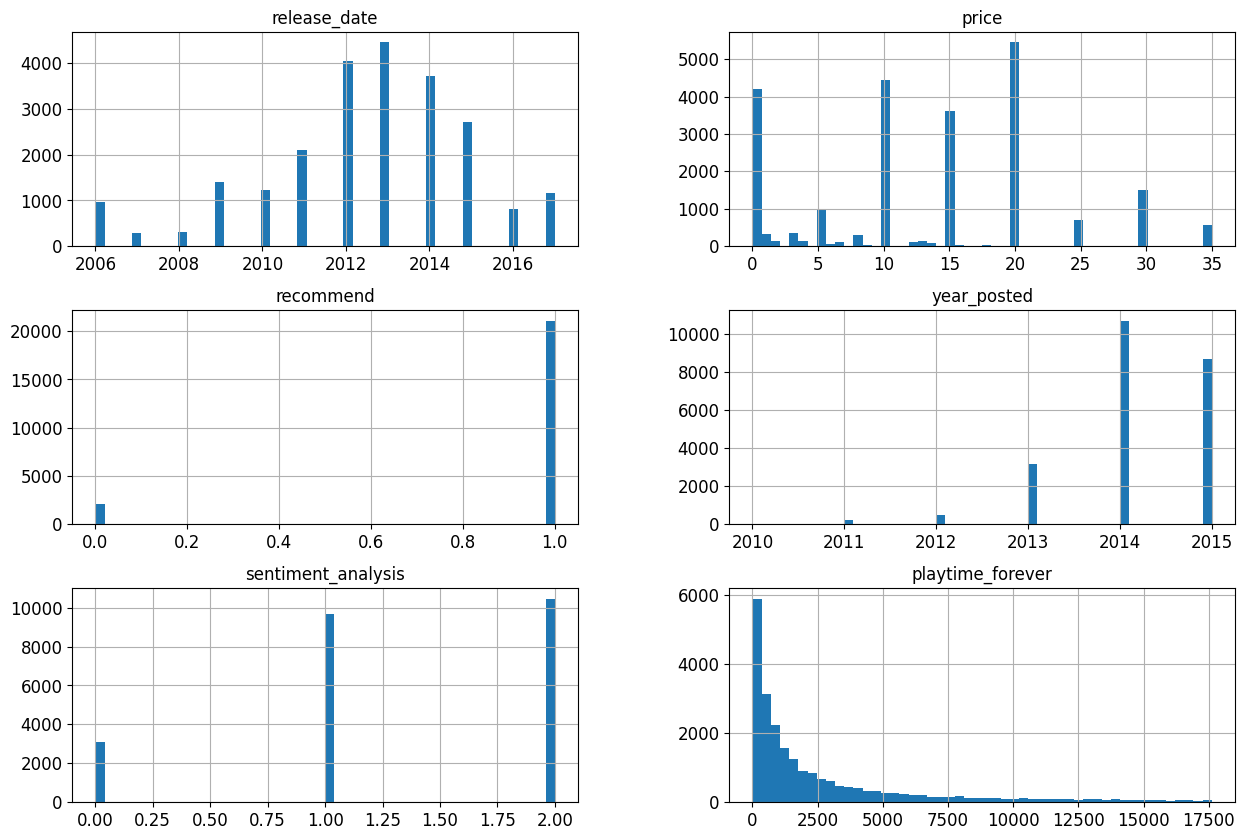

In [17]:
data.hist(bins=50, figsize=(15,10))
plt.show()

de acuerdo a lo observado en la descripcion estadistica y los graficos generados de las variables numericas se observan outliers en las siguientes variables: 'release_date', 'price' y 'playtime_forever', las cuales deben ser eliminadas para no alterar el modelo que se pretende ejecutar

In [18]:
"""
data1 = data['release_date']
data2 = data['price']
data3 = data['playtime_forever']
"""

"\ndata1 = data['release_date']\ndata2 = data['price']\ndata3 = data['playtime_forever']\n"

In [21]:
"""
# Calcula el rango intercuartil (IQR) para cada variable
Q1_1 = data1.quantile(0.25)
Q3_1 = data1.quantile(0.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = data2.quantile(0.25)
Q3_2 = data2.quantile(0.75)
IQR_2 = Q3_2 - Q1_2

Q1_3 = data3.quantile(0.25)
Q3_3 = data3.quantile(0.75)
IQR_3 = Q3_3 - Q1_3

print('release_date:','Q1:', Q1_1,'Q3:', Q3_1,'IQR:', IQR_1)
print('price:','Q1:', Q1_2,'Q3:', Q3_2,'IQR:', IQR_2)
print('playtime_forever:','Q1:', Q1_3,'Q3:', Q3_3,'IQR:', IQR_3)
"""

"\n# Calcula el rango intercuartil (IQR) para cada variable\nQ1_1 = data1.quantile(0.25)\nQ3_1 = data1.quantile(0.75)\nIQR_1 = Q3_1 - Q1_1\n\nQ1_2 = data2.quantile(0.25)\nQ3_2 = data2.quantile(0.75)\nIQR_2 = Q3_2 - Q1_2\n\nQ1_3 = data3.quantile(0.25)\nQ3_3 = data3.quantile(0.75)\nIQR_3 = Q3_3 - Q1_3\n\nprint('release_date:','Q1:', Q1_1,'Q3:', Q3_1,'IQR:', IQR_1)\nprint('price:','Q1:', Q1_2,'Q3:', Q3_2,'IQR:', IQR_2)\nprint('playtime_forever:','Q1:', Q1_3,'Q3:', Q3_3,'IQR:', IQR_3)\n"

In [22]:
"""
# Define los límites inferior y superior para cada variable
lower_bound1 = round(Q1_1 - 1.5 * IQR_1)
upper_bound1 = round(Q3_1 + 1.5 * IQR_1)

#lower_bound2 = round(Q1_2 - 1.5 * IQR_2) # si resulta un valor negativo se condera = 0
lower_bound2 = 0
upper_bound2 = round(Q3_2 + 1.5 * IQR_2)

#lower_bound3 = round(Q1_3 - 1.5 * IQR_3) # si resulta un valor negativo se condera = 1
lower_bound3 = 1
upper_bound3 = round(Q3_3 + 1.5 * IQR_3)

print('release_date: lower_bound:', lower_bound1, 'upper_bound:', upper_bound1)
print('price: lower_bound:', lower_bound2, 'upper_bound:', upper_bound2)
print('playtime_forever: lower_bound:', lower_bound3, 'upper_bound:', upper_bound3)
"""

"\n# Define los límites inferior y superior para cada variable\nlower_bound1 = round(Q1_1 - 1.5 * IQR_1)\nupper_bound1 = round(Q3_1 + 1.5 * IQR_1)\n\n#lower_bound2 = round(Q1_2 - 1.5 * IQR_2) # si resulta un valor negativo se condera = 0\nlower_bound2 = 0\nupper_bound2 = round(Q3_2 + 1.5 * IQR_2)\n\n#lower_bound3 = round(Q1_3 - 1.5 * IQR_3) # si resulta un valor negativo se condera = 1\nlower_bound3 = 1\nupper_bound3 = round(Q3_3 + 1.5 * IQR_3)\n\nprint('release_date: lower_bound:', lower_bound1, 'upper_bound:', upper_bound1)\nprint('price: lower_bound:', lower_bound2, 'upper_bound:', upper_bound2)\nprint('playtime_forever: lower_bound:', lower_bound3, 'upper_bound:', upper_bound3)\n"

In [23]:
"""
# Elimina los outliers de las variables mencionadas

data = data[(data['release_date'] >= lower_bound1) & (data['release_date'] <= upper_bound1)]
data = data[(data['price'] >= lower_bound2) & (data['price'] <= upper_bound2)]
data = data[(data['playtime_forever'] >= lower_bound3) & (data['playtime_forever'] <= upper_bound3)]
"""

"\n# Elimina los outliers de las variables mencionadas\n\ndata = data[(data['release_date'] >= lower_bound1) & (data['release_date'] <= upper_bound1)]\ndata = data[(data['price'] >= lower_bound2) & (data['price'] <= upper_bound2)]\ndata = data[(data['playtime_forever'] >= lower_bound3) & (data['playtime_forever'] <= upper_bound3)]\n"

In [24]:
# data.to_csv('data_steam.csv', index=False)

In [25]:
# transformar etiquetas categóricas a valores numéricos

le = preprocessing.LabelEncoder()

data['user_id1'] = le.fit_transform(data['user_id'].copy())    
data['item_id1'] = le.fit_transform(data['item_id'].copy())
data['genre1'] = le.fit_transform(data['genre'].copy())
data['developer1'] = le.fit_transform(data['developer'].copy())
data['title1'] = le.fit_transform(data['title'].copy())

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23240 entries, 0 to 23239
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  23240 non-null  object 
 1   user_id             23240 non-null  object 
 2   item_id             23240 non-null  object 
 3   title               23240 non-null  object 
 4   genre               23240 non-null  object 
 5   developer           23240 non-null  object 
 6   release_date        23240 non-null  int32  
 7   price               23240 non-null  float64
 8   recommend           23240 non-null  int64  
 9   year_posted         23240 non-null  int64  
 10  sentiment_analysis  23240 non-null  int64  
 11  playtime_forever    23240 non-null  int64  
 12  user_id1            23240 non-null  int32  
 13  item_id1            23240 non-null  int32  
 14  genre1              23240 non-null  int32  
 15  developer1          23240 non-null  int32  
 16  titl

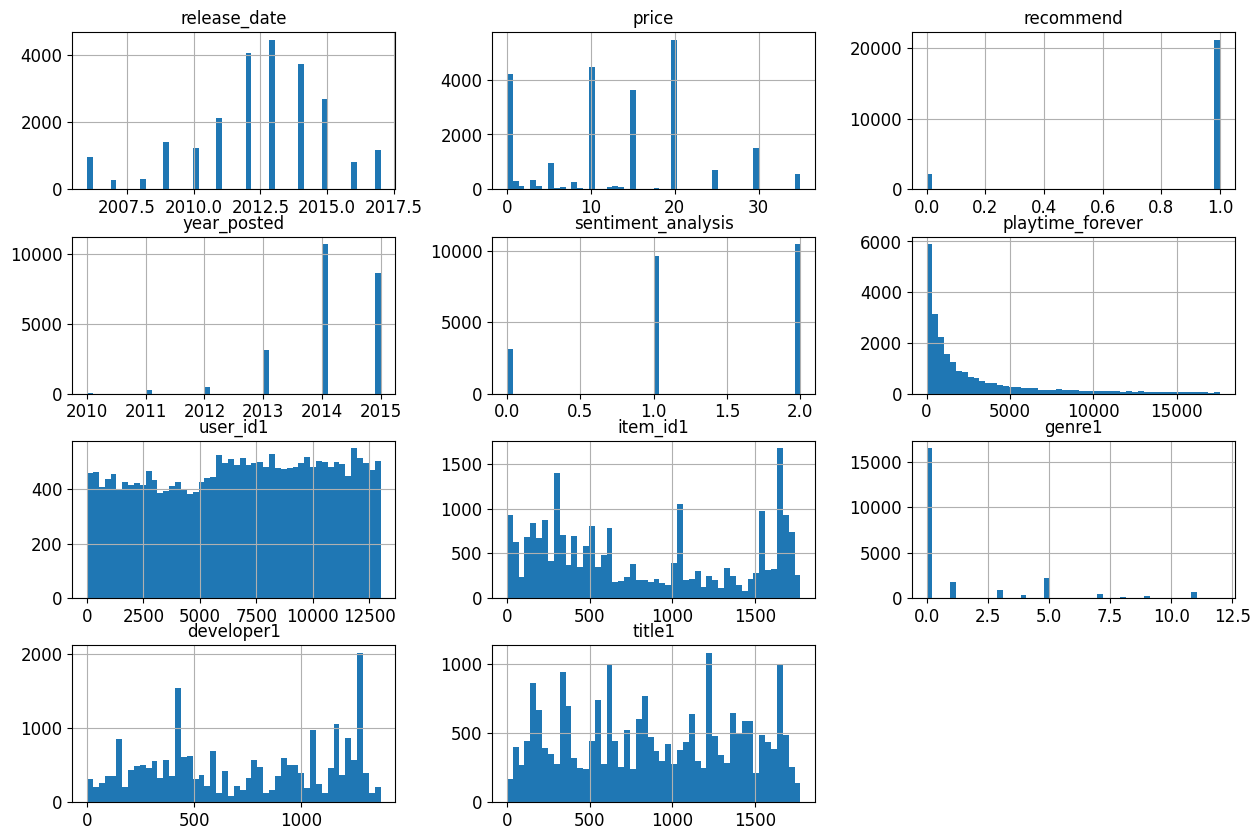

In [27]:
data.hist(bins=50, figsize=(15,10))
plt.show()

luego de eliminar los outliers se nota una distribucion mas tipica con diferentes comportamientos, tambien se incluye 'genre' despues de mapear los valores.

In [28]:
data = data[['genre1', 'title1', 'developer1','release_date','price','recommend','year_posted','sentiment_analysis','playtime_forever','user_id1','item_id1']]

In [29]:
corr_matrix = data.corr()
corr_matrix['item_id1'].sort_values(ascending=False)

item_id1              1.000000
genre1                0.125469
developer1            0.106540
playtime_forever      0.099864
year_posted           0.077231
recommend             0.024235
price                 0.021967
user_id1              0.016439
sentiment_analysis    0.002634
title1               -0.093616
release_date         -0.150694
Name: item_id1, dtype: float64

In [30]:
data.corr()

,genre1,title1,developer1,release_date,price,recommend,year_posted,sentiment_analysis,playtime_forever,user_id1,item_id1
genre1,1.000000,-0.019211,-0.105160,-0.214551,0.125315,0.018390,-0.001214,0.005859,0.050924,-0.006740,0.125469
title1,-0.019211,1.000000,0.040520,0.170110,-0.145086,0.020487,0.006297,-0.002932,-0.046142,0.007432,-0.093616
developer1,-0.105160,0.040520,1.000000,-0.011327,-0.051695,0.026057,-0.023483,0.005434,0.009643,0.008297,0.106540
release_date,-0.214551,0.170110,-0.011327,1.000000,-0.141952,-0.070771,0.311649,-0.028349,-0.147002,-0.009603,-0.150694
price,0.125315,-0.145086,-0.051695,-0.141952,1.000000,0.053842,-0.076762,0.024912,0.116610,-0.030635,0.021967
recommend,0.018390,0.020487,0.026057,-0.070771,0.053842,1.000000,-0.112993,0.239519,0.111044,0.006775,0.024235
year_posted,-0.001214,0.006297,-0.023483,0.311649,-0.076762,-0.112993,1.000000,-0.077580,-0.042566,-0.034683,0.077231
sentiment_analysis,0.005859,-0.002932,0.005434,-0.028349,0.024912,0.239519,-0.077580,1.000000,0.058936,-0.004054,0.002634
playtime_forever,0.050924,-0.046142,0.009643,-0.147002,0.116610,0.111044,-0.042566,0.058936,1.000000,-0.032739,0.099864
user_id1,-0.006740,0.007432,0.008297,-0.009603,-0.030635,0.006775,-0.034683,-0.004054,-0.032739,1.000000,0.016439


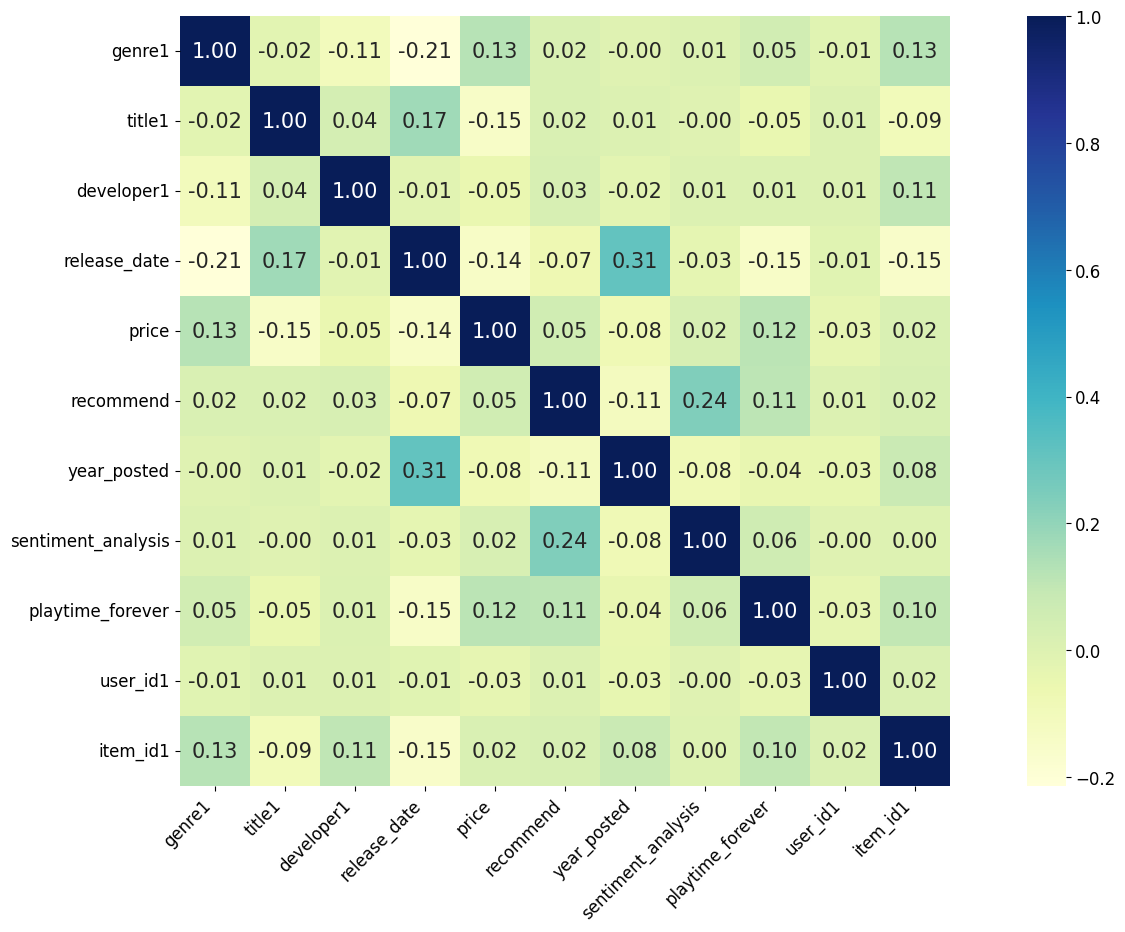

In [31]:
plt.figure(figsize=(20, 10))

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={"size": 15}, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

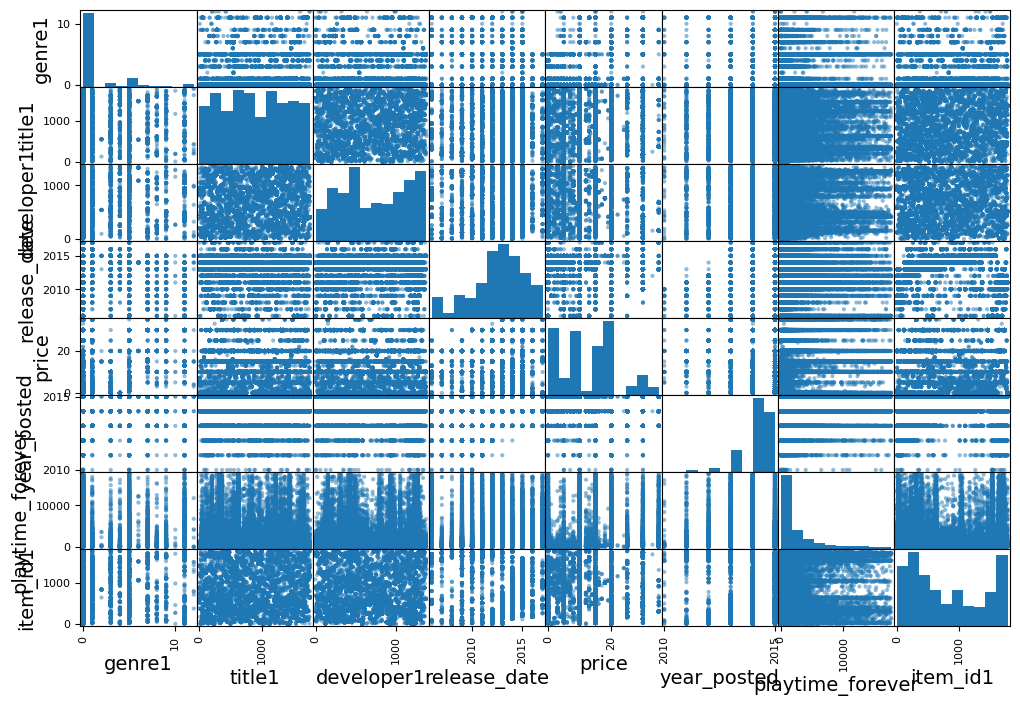

In [32]:
from pandas.plotting import scatter_matrix

attributes = ['genre1','title1','developer1','release_date','price','year_posted','playtime_forever','item_id1']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

A mayor número de "item_id", mayor preferencia por jugar más horas. Esto indica que los usuarios que tienen acceso a una mayor variedad de juegos son más propensos a dedicarles más tiempo.
Existe una concentración de usuarios que prefieren precios más bajos. Esto sugiere que el precio es un factor importante a la hora de elegir un juego para muchos usuarios.
Parece ser que un género de juego es el favorito de la mayoría. Esto indica que hay un género que tiene mayor aceptación entre los usuarios que los demás.

In [33]:
# seleccion de variables por informacion mutua

X = data.iloc[:, :-1].values # Variables independientes
y = data.iloc[:, -1].values # Variable dependiente (la que queremos predecir)

sel = SelectKBest(mutual_info_classif, k=4)
data_redu = sel.fit_transform(X, y)
data_redu.shape

columnas = sel.get_support(indices=True)
columnas_sel = data.iloc[:,columnas].columns.tolist()
columnas_sel

# muestra la cantidad de variables (k) que son mas correlacionadas con la variable objetivo 

['title1', 'developer1', 'release_date', 'price']